In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

def preprocess_text(text):
    text = text.lower()

    text = re.sub(r'[^\w\s]', '', text)

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

headline = "Google employee charged with stealing AI trade secrets"
keywords = ['google', 'employee', 'charged', 'stealing', 'ai', 'trade', 'secret']

full_text = headline + ' ' + ' '.join(keywords)

preprocessed_text = preprocess_text(full_text)
print(preprocessed_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['google', 'employee', 'charged', 'stealing', 'ai', 'trade', 'secret', 'google', 'employee', 'charged', 'stealing', 'ai', 'trade', 'secret']


In [ ]:
import re

def extract_words(text):
    # Define a regular expression pattern to match words containing non-ASCII characters
    pattern = re.compile(r'[\u0900-\u097F]+')
    # Use findall to extract all words from the text
    words = pattern.findall(text)
    return words

text = "[('यूपी', 1), ('सरकार', 1), ('ने', 1), ('uppc', 1), ('प्रारंभिक', 1)]"
words_only = extract_words(text)
print(words_only)


['यूपी', 'सरकार', 'ने', 'प्रारंभिक']


In [ ]:
import re
import pandas as pd

def extract_words_from_csv_and_add_column(csv_file):

    df = pd.read_csv(csv_file)


    pattern = re.compile(r'[\u0900-\u097F]+')
    extracted_words = []
    for index, row in df.iterrows():
        text = row['Keywords']
        words = pattern.findall(str(text))
        extracted_words.append(words)


    df['Keywords'] = extracted_words


    new_csv_file = csv_file.replace('.csv', 'hindi_headline_processed.csv')
    df.to_csv(new_csv_file, index=False)

    print(f"New CSV file '{new_csv_file}' with extracted words column has been created.")

csv_file = "/content/Hindi_headline1.csv"


extract_words_from_csv_and_add_column(csv_file)


New CSV file '/content/Hindi_headline1hindi_headline_processed.csv' with extracted words column has been created.


In [ ]:
import pandas as pd


df1 = pd.read_csv('/content/english_news_sentiment analysis.csv')


df2 = pd.read_csv('/content/Hindi_headline1hindi_headline_processed.csv')

combined_df = pd.concat([df1, df2], axis=0, ignore_index=True)

print(combined_df)


      Unnamed: 0                                           Headline  \
0            0.0  Google employee charged with stealing AI trade...   
1            1.0  Top AI photo generators produce misleading ele...   
2            2.0  OpenAI publishes Elon Musk’s emails. ‘We’re sa...   
3            3.0  Elon Musk’s X must face copyright infringement...   
4            4.0  Apple iPhones sales fall 24% in China amid com...   
...          ...                                                ...   
1982         NaN  CAA लागू, राज्यों में अलर्ट : दिल्ली, नोएडा और...   
1983         NaN  लोकसभा स्पीकर ने अयोध्या में किए रामलला के दर्...   
1984         NaN  "जानबूझकर लोकसभा चुनाव से ठीक पहले..." : CAA ल...   
1985         NaN  Candidate Kaun: क्या बलिया से वीरेंद्र सिंह का...   
1986         NaN  बारामती सीट: 'साहेब','दादा' और 'ताई' की जंग का...   

             Domain                                           Keywords  \
0     Business-Tech  ['google', 'employee', 'charged', 'stealing', ...   

In [ ]:
combined_df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
combined_df

,Headline,Domain,Keywords,Sentiment
0,Google employee charged with stealing AI trade...,Business-Tech,"['google', 'employee', 'charged', 'stealing', ...",Negative
1,Top AI photo generators produce misleading ele...,Business-Tech,"['top', 'ai', 'photo', 'generator', 'produce',...",Negative
2,OpenAI publishes Elon Musk’s emails. ‘We’re sa...,Business-Tech,"['openai', 'publishes', 'elon', 'musk', '’', '...",Negative
3,Elon Musk’s X must face copyright infringement...,Business-Tech,"['elon', 'musk', '’', 'x', 'must', 'face', 'co...",Negative
4,Apple iPhones sales fall 24% in China amid com...,Business-Tech,"['apple', 'iphones', 'sale', 'fall', '24', 'ch...",Neutral
...,...,...,...,...
1982,"CAA लागू, राज्यों में अलर्ट : दिल्ली, नोएडा और...",India,"['में', 'लागू', 'राज्यों']",Neutral
1983,लोकसभा स्पीकर ने अयोध्या में किए रामलला के दर्...,India,"['लोकसभा', 'स्पीकर', 'ने', 'अयोध्या', 'में']",Neutral
1984,"""जानबूझकर लोकसभा चुनाव से ठीक पहले..."" : CAA ल...",India,"['जानबूझकर', 'लोकसभा', 'चुनाव', 'से']",Neutral
1985,Candidate Kaun: क्या बलिया से वीरेंद्र सिंह का...,India,"['का', 'क्या']",Neutral


In [ ]:
csv_file = "Combined_headlines_processed.csv"

# Save DataFrame to CSV
combined_df.to_csv(csv_file, index=False)


NameError: name 'combined_df' is not defined

#2


In [ ]:
import pandas as pd
data = pd.read_csv("Combined_headlines_processed.csv")

In [ ]:
import pandas as pd

english_df = data.iloc[:1289]
hindi_df = data.iloc[1289:]

english_train_size = int(len(english_df)*0.75)
hindi_train_size = int(len(hindi_df)*0.75)

english_train_data = english_df.iloc[:english_train_size]
english_test_data = english_df.iloc[english_train_size:]

hindi_train_data = hindi_df.iloc[:hindi_train_size]
hindi_test_data = hindi_df.iloc[hindi_train_size:]

training_data = pd.concat([english_train_data, hindi_train_data], ignore_index=True)
testing_data = pd.concat([english_test_data, hindi_test_data], ignore_index=True)

training_data = training_data.sample(frac=1).reset_index(drop=True)
testing_data = testing_data.sample(frac=1).reset_index(drop=True)

print("Size of training data:", len(training_data))
print("Size of testing data:", len(testing_data))

Size of training data: 1489
Size of testing data: 498


In [ ]:
csv_file = "training_data.csv"

# Save DataFrame to CSV
training_data.to_csv(csv_file, index=False)

In [ ]:
!pip install torch transformers pandas


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
import torch
from torch.utils.data import DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

training_data = pd.read_csv("training_data.csv")

X = training_data[['Headline', 'Keywords']]
y_domain = training_data['Domain']
y_sentiment = training_data['Sentiment']

X_train, X_val, y_domain_train, y_domain_val, y_sentiment_train, y_sentiment_val = train_test_split(
    X, y_domain, y_sentiment, test_size=0.05, random_state=42)

domain_label_encoder = LabelEncoder()
sentiment_label_encoder = LabelEncoder()

y_train_domain_encoded = domain_label_encoder.fit_transform(y_domain_train)
y_val_domain_encoded = domain_label_encoder.transform(y_domain_val)

y_train_sentiment_encoded = sentiment_label_encoder.fit_transform(y_sentiment_train)
y_val_sentiment_encoded = sentiment_label_encoder.transform(y_sentiment_val)

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

For test data

In [ ]:
X_test = testing_data[['Headline', 'Keywords']]
y_domain_test = testing_data['Domain']
y_sentiment_test= testing_data['Sentiment']


y_test_domain_encoded = domain_label_encoder.fit_transform(y_domain_test)
y_test_sentiment_encoded = sentiment_label_encoder.fit_transform(y_sentiment_test)


In [ ]:
def tokenize_data(headlines, keywords, max_length=128):
    encoded_inputs = tokenizer(
        headlines,
        keywords,
        padding='max_length',
        truncation=True,
        max_length=max_length,
        return_tensors='pt'
    )
    return encoded_inputs

X_train_tokenized = tokenize_data(X_train['Headline'].tolist(), X_train['Keywords'].tolist())
X_val_tokenized = tokenize_data(X_val['Headline'].tolist(), X_val['Keywords'].tolist())

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

In [ ]:
X_test_tokenized = tokenize_data(X_test['Headline'].tolist(), X_test['Keywords'].tolist())

#3

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)  # Convert label to tensor with dtype=torch.long
        return item

    def __len__(self):
        return len(self.labels)



train_dataset = CustomDataset(X_train_tokenized, y_train_domain_encoded)
val_dataset = CustomDataset(X_val_tokenized, y_val_domain_encoded)
test_dataset = CustomDataset(X_test_tokenized, y_test_domain_encoded)

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=len(training_data['Domain'].unique()))


epochs = 10
batch_size = 16
lr = 2e-5


optimizer = torch.optim.AdamW(model.parameters(), lr=lr)


criterion = torch.nn.CrossEntropyLoss()


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

<ipython-input-8-4013bed3dc04>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-8-4013bed3dc04>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 1/10, Training Accuracy: 0.3041, Validation Accuracy: 0.5867, Time: 32.09 seconds


<ipython-input-8-4013bed3dc04>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-8-4013bed3dc04>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 2/10, Training Accuracy: 0.6400, Validation Accuracy: 0.6267, Time: 32.55 seconds


<ipython-input-8-4013bed3dc04>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-8-4013bed3dc04>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 3/10, Training Accuracy: 0.7850, Validation Accuracy: 0.7333, Time: 33.97 seconds


<ipython-input-8-4013bed3dc04>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-8-4013bed3dc04>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 4/10, Training Accuracy: 0.8600, Validation Accuracy: 0.6533, Time: 33.28 seconds


<ipython-input-8-4013bed3dc04>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-8-4013bed3dc04>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 5/10, Training Accuracy: 0.9123, Validation Accuracy: 0.6400, Time: 33.24 seconds


<ipython-input-8-4013bed3dc04>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-8-4013bed3dc04>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 6/10, Training Accuracy: 0.9321, Validation Accuracy: 0.6400, Time: 33.54 seconds


<ipython-input-8-4013bed3dc04>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-8-4013bed3dc04>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 7/10, Training Accuracy: 0.9562, Validation Accuracy: 0.6533, Time: 33.32 seconds


<ipython-input-8-4013bed3dc04>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-8-4013bed3dc04>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 8/10, Training Accuracy: 0.9675, Validation Accuracy: 0.7333, Time: 33.30 seconds


<ipython-input-8-4013bed3dc04>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-8-4013bed3dc04>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 9/10, Training Accuracy: 0.9696, Validation Accuracy: 0.7333, Time: 33.32 seconds


<ipython-input-8-4013bed3dc04>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-8-4013bed3dc04>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 10/10, Training Accuracy: 0.9802, Validation Accuracy: 0.6800, Time: 33.32 seconds


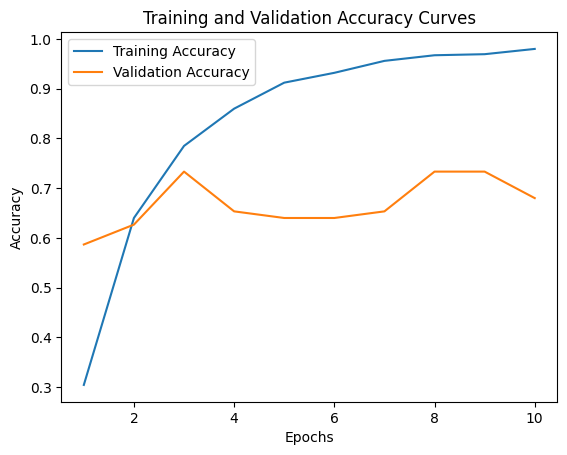

In [ ]:
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    start_time = time.time()
    model.train()
    train_preds = []
    train_targets = []
    for batch in train_dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        targets = labels.cpu().numpy()

        train_preds.extend(preds)
        train_targets.extend(targets)

    train_accuracy = accuracy_score(train_targets, train_preds)


    model.eval()
    val_preds = []
    val_targets = []
    for batch in val_dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)

        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        targets = labels.cpu().numpy()

        val_preds.extend(preds)
        val_targets.extend(targets)

    val_accuracy = accuracy_score(val_targets, val_preds)

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    epoch_time = time.time() - start_time
    print(f"Epoch {epoch+1}/{epochs}, Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}, Time: {epoch_time:.2f} seconds")

# Plotting the accuracy curves
plt.plot(range(1, epochs+1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, epochs+1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Curves')
plt.legend()
plt.show()


Training F1 Score: 0.9800
Validation F1 Score: 0.7131


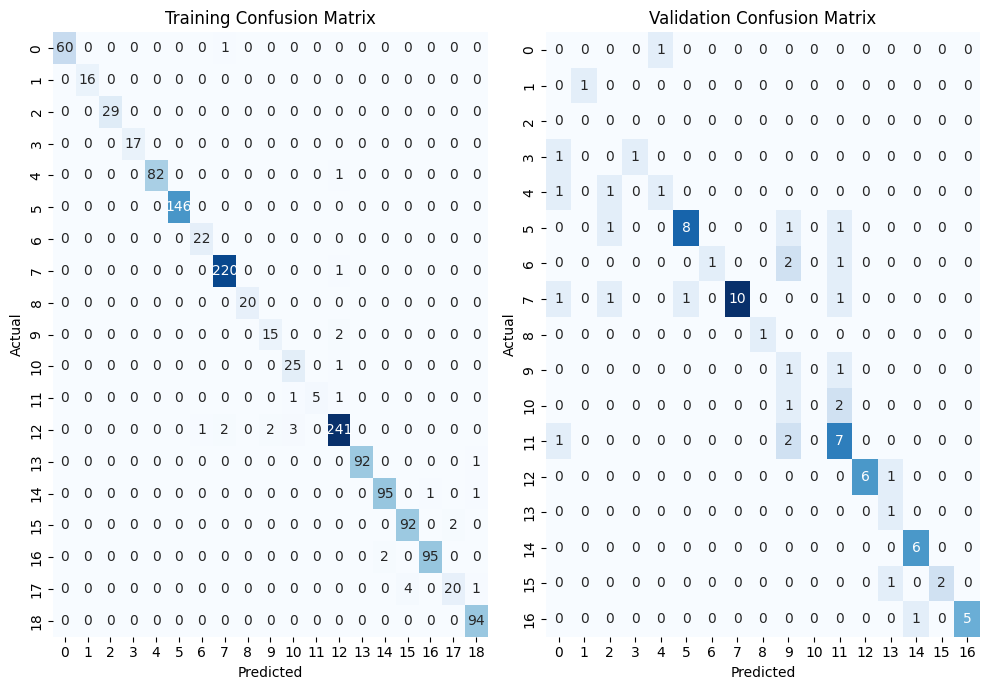

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import numpy as np


train_f1 = f1_score(train_targets, train_preds, average='weighted')
val_f1 = f1_score(val_targets, val_preds, average='weighted')

print(f"Training F1 Score: {train_f1:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")


conf_mat_train = confusion_matrix(train_targets, train_preds)
conf_mat_val = confusion_matrix(val_targets, val_preds)


plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
sns.heatmap(conf_mat_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(conf_mat_val, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score


train_precision = precision_score(train_targets, train_preds, average='weighted')
val_precision = precision_score(val_targets, val_preds, average='weighted')

print(f"Training Precision Score: {train_precision:.4f}")
print(f"Validation Precision Score: {val_precision:.4f}")


train_recall = recall_score(train_targets, train_preds, average='weighted')
val_recall = recall_score(val_targets, val_preds, average='weighted')

print(f"Training Recall Score: {train_recall:.4f}")
print(f"Validation Recall Score: {val_recall:.4f}")


Training Precision Score: 0.9804
Validation Precision Score: 0.8057
Training Recall Score: 0.9802
Validation Recall Score: 0.6800


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


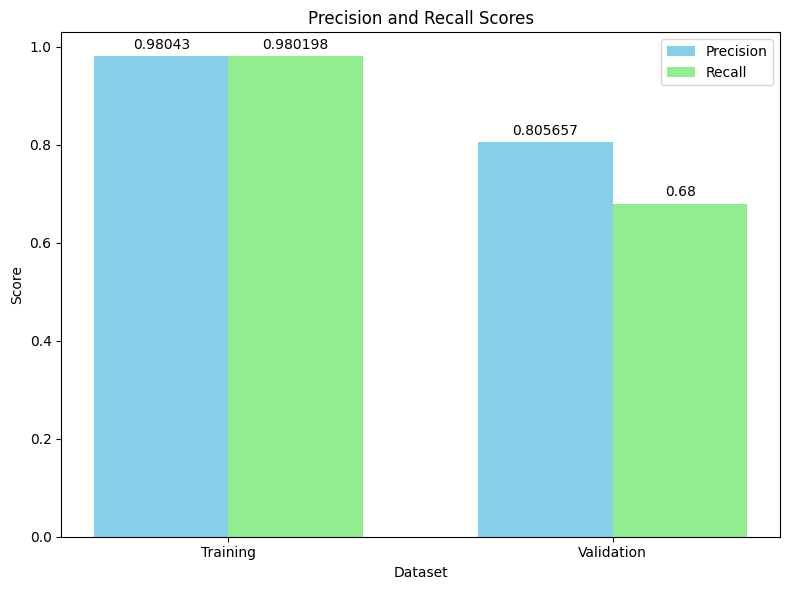

In [ ]:
# Plotting Precision and Recall Scores
labels = ['Training', 'Validation']
precision_scores = [train_precision, val_precision]
recall_scores = [train_recall, val_recall]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))

rects1 = ax.bar(x - width/2, precision_scores, width, label='Precision', color='skyblue')
rects2 = ax.bar(x + width/2, recall_scores, width, label='Recall', color='lightgreen')

ax.set_xlabel('Dataset')
ax.set_ylabel('Score')
ax.set_title('Precision and Recall Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()
